# Demo of tree drawing with ETE3

In the __[previous demo](ETE3.demo.ipynb)__ we looked at ETE3, focussing on managing, maniplating and exploring trees with the various methods of the Tree class.

In this demo, we'll look at using the graphical features of ETE3 to draw trees for making publication-ready tree figures. As before, this will rely heavily on the great __[ETE3 tutorial](http://etetoolkit.org/docs/latest/tutorial/tutorial_drawing.html)__.

We won't spend much time with the interactive tree drawing engine, as I don't use that much, but will rather focus on the programatic drawing features. If you want to try the interactive viewer, you can try replacing `t.render(...)` with `t.show()`.

Note that in most of this, I am using the `%%inline` magic word to make the figures show up in the notebook. You can replace these with a filename and the tree will be saved in the current folder with that name.

Also note that it looks like since the Tutorial was written, the method for making random branch lenghts has changed from `random_dist` to `random_branches`.


In [1]:
# Let's import everything we'll need for the notebook here
from ete3 import Tree, TreeStyle, NodeStyle


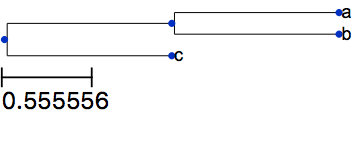

In [2]:
#Make a tree and plot it.
t = Tree( "((a,b),c);" )
t.render("%%inline", w=100, units="mm")

In [3]:
#Try the interactive viewer
t.show()

#NOTE: You need to close the window to proceed!

## TreeStyle class
The TreeStyle class can control a number of visual aspects of a tree. For example the circular mode can be used to draw a tree as a circle tree:

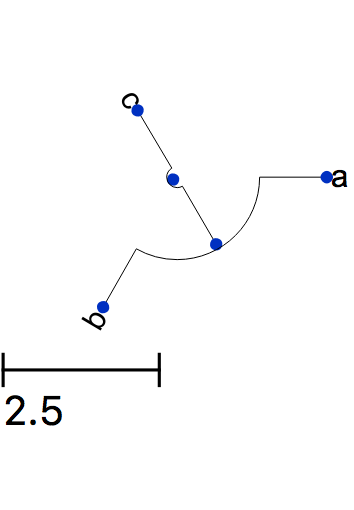

In [4]:
circular_style = TreeStyle()
circular_style.mode = "c" # draw tree in circular mode
circular_style.scale = 20
t.render("%%inline", w=100, units="mm", tree_style=circular_style)


You can turn on and off various labels, like leaf names, branch lengths and support, etc.

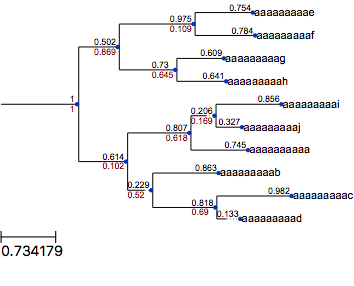

In [5]:
t = Tree()
t.populate(10, random_branches=True)
ts = TreeStyle()  #Make a TreeStyle object, then modify it
ts.show_leaf_name = True
ts.show_branch_length = True
ts.show_branch_support = True
t.render("%%inline", w=100, units="mm", tree_style=ts) #Render the tree using the TreeStyle

Probably a good idea to look at the __[<code>TreeStyle</code>](http://etetoolkit.org/docs/latest/reference/reference_treeview.html#ete3.TreeStyle)__ documentation, but some of the highlights:
1. Tree Shape:
    - mode ("r"): ("r")ectangular vs ("c")ircular
    - orientation (0): 1 flips tree
    - rotation (0): rotate X degrees clock-wise
    - min_lead_separation (1)
    - branch_vertical_margin (0)
    - arc_start (0)
    - arc_span (359)
    - margin_[left,right,top,bottom]

2. Tree branches:
    - scale
    - root_opening_factor
    - complete_branch_lines_when_necessary
    - extra_branch_line_type
    - extra_branch_line_color
    - force_topology
    - draw_guiding_lines
    - guiding_lines_type
    - guiding_lines_color

3. Node faces:
    - allow_face_overlap
    - draw_aligned_faces_as_table
    - children_faces_on_top

4. Addons:
    - show_border
    - show_scale
    - show_leaf_names
    - show_branch_length
    - show_branch_support
    
   

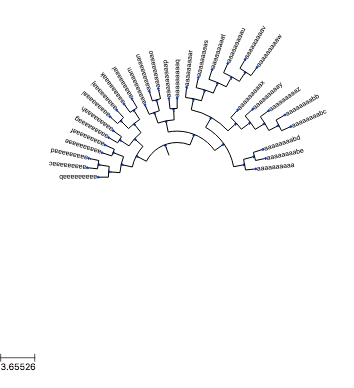

In [6]:
t = Tree()
t.populate(30)
ts = TreeStyle()
ts.show_leaf_name = True
ts.mode = "c"
ts.arc_start = -180 # 0 degrees = 3 o'clock
ts.arc_span = 180
t.render("%%inline", w=100, units="mm", tree_style=ts)

## NodeStyle class
Through the __[`NodeStyle`](http://etetoolkit.org/docs/latest/reference/reference_treeview.html#ete3.NodeStyle)__ class the aspect of each single node can be controlled, including its size, color, background and branch type.

A node style can be defined statically and attached to several nodes:



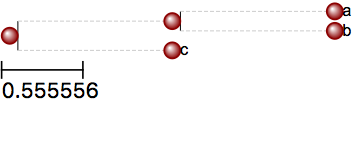

In [7]:
t = Tree( "((a,b),c);" )

# Basic tree style
ts = TreeStyle()
ts.show_leaf_name = True

# Draws nodes as small red spheres of diameter equal to 10 pixels
nstyle = NodeStyle()
nstyle["shape"] = "sphere"
nstyle["size"] = 10
nstyle["fgcolor"] = "darkred"

# Gray dashed branch lines
nstyle["hz_line_type"] = 1
nstyle["hz_line_color"] = "#cccccc"

# Applies the same static style to all nodes in the tree. Note that,
# if "nstyle" is modified, changes will affect to all nodes
for n in t.traverse():
   n.set_style(nstyle)

t.render("%%inline", w=100, units="mm", tree_style=ts)

## Mixing it up with colors!!

So here, the tutorial goes into some not too exciting example of adding different colors to a root node...But in the last demo, we used the tree attributes to make a color attribute...how about we color the nodes by their attribute!

Here was the code for the tree:

In [93]:
t =  Tree("((((((4, e), i), o),h), u), ((3, 4), (i, june)));")
# we annotate the tree using external data
colors = {"a":"red", "e":"green", "i":"yellow",
          "o":"black", "u":"purple", "4":"green",
          "3":"yellow", "1":"white", "5":"red",
          "june":"yellow"}
for leaf in t:
    leaf.add_features(color=colors.get(leaf.name, "none"))
print (t.get_ascii(attributes=["name", "color"], show_internal=False))



                  /-4, green
               /-|
            /-|   \-e, green
           |  |
         /-|   \-i, yellow
        |  |
      /-|   \-o, black
     |  |
   /-|   \-h, none
  |  |
  |   \-u, purple
--|
  |      /-3, yellow
  |   /-|
  |  |   \-4, green
   \-|
     |   /-i, yellow
      \-|
         \-june, yellow


And now the ETE magic...


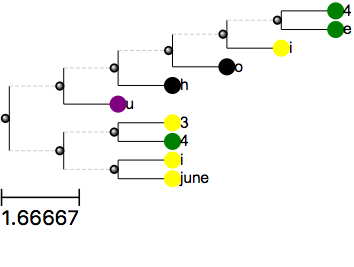

In [94]:
# Use the tree from above.

ts=TreeStyle()
ts.mode="r"
ts.
# Draws nodes as spheres of diameter equal to 10 pixels
nstyle = NodeStyle()
nstyle["shape"] = "sphere"
nstyle["size"] = 5
nstyle["fgcolor"] = "black"

# Gray dashed branch lines
nstyle["hz_line_type"] = 1
nstyle["hz_line_color"] = "#cccccc"

#set the static style
for n in t.traverse():
    if n.is_leaf(): #if the node is a leaf
        n.img_style["fgcolor"] = n.color #And set that node style for the node
        n.img_style["size"] = 10
    else:
        n.set_style(nstyle)


t.render("%%inline", w=100, units="mm", tree_style=ts)

### Layout functions
This may be another way to do some of this, but the documentation and examples were not the best and these two examples are the best I could do here... :-( At least they work now...


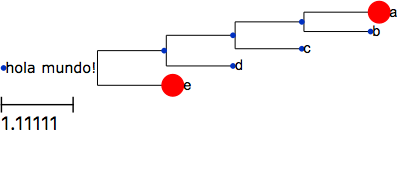

In [97]:
t = Tree( "((((a,b),c), d), e);" )

def abc_layout(node):
    vowels = set(["a", "e", "i", "o", "u"])
    if node.name in vowels:
       # Note that node style are already initialized with the
       # default values
       node.img_style["size"] = 15
       node.img_style["fgcolor"] = "red"

# Basic tree style
ts = TreeStyle()
ts.show_leaf_name = True

# Add two text faces to different columns
t.add_face(TextFace("hola "), column=0, position = "branch-right")
t.add_face(TextFace("mundo!"), column=1, position = "branch-right")

ts.layout_fn = abc_layout
t.render("%%inline", w=400, tree_style=ts)

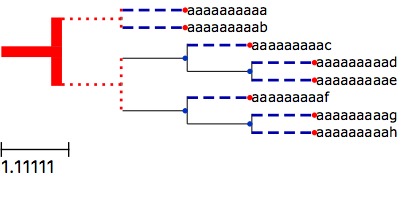

In [50]:
from ete3 import Tree, faces, AttrFace, TreeStyle, NodeStyle

def layout(node):
    # If node is a leaf, add the nodes name and a its scientific name
    if node.is_leaf():
        faces.add_face_to_node(AttrFace("name"), node, column=2)
        node.img_style["fgcolor"] = "red"

def get_example_tree():

    t = Tree()
    t.populate(8)

    # Node style handling is no longer limited to layout functions. You
    # can now create fixed node styles and use them many times, save them
    # or even add them to nodes before drawing (this allows to save and
    # reproduce an tree image design)

    # Set bold red branch to the root node
    style = NodeStyle()
    style["fgcolor"] = "#0f0f0f"
    style["size"] = 0
    style["vt_line_color"] = "#ff0000"
    style["hz_line_color"] = "#ff0000"
    style["vt_line_width"] = 8
    style["hz_line_width"] = 8
    style["vt_line_type"] = 0 # 0 solid, 1 dashed, 2 dotted
    style["hz_line_type"] = 0
    t.set_style(style)

    #Set dotted red lines to the first two branches
    style1 = NodeStyle()
    style1["fgcolor"] = "#0f0f0f"
    style1["size"] = 0
    style1["vt_line_color"] = "#ff0000"
    style1["hz_line_color"] = "#ff0000"
    style1["vt_line_width"] = 2
    style1["hz_line_width"] = 2
    style1["vt_line_type"] = 2 # 0 solid, 1 dashed, 2 dotted
    style1["hz_line_type"] = 2
    t.children[0].img_style = style1
    t.children[1].img_style = style1

    # Set dashed blue lines in all leaves
    style2 = NodeStyle()
    style2["fgcolor"] = "#000000"
    style2["shape"] = "circle"
    style2["vt_line_color"] = "#0000aa"
    style2["hz_line_color"] = "#0000aa"
    style2["vt_line_width"] = 2
    style2["hz_line_width"] = 2
    style2["vt_line_type"] = 1 # 0 solid, 1 dashed, 2 dotted
    style2["hz_line_type"] = 1
    for l in t.iter_leaves():
        l.img_style = style2

    ts = TreeStyle()
    ts.layout_fn = layout
    ts.show_leaf_name = False

    return t, ts

t, ts = get_example_tree()
#t.show(tree_style=ts)
t.render("%%inline", w=400, tree_style=ts)

## Node Backgrounds:



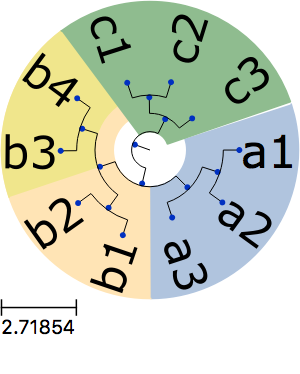

In [106]:
from ete3 import Tree, faces, AttrFace, TreeStyle, NodeStyle

def layout(node):
    if node.is_leaf():
        N = AttrFace("name", fsize=30)
        faces.add_face_to_node(N, node, 0, position="aligned")

def get_example_tree():

    # Set dashed blue lines in all leaves
    nst1 = NodeStyle()
    nst1["bgcolor"] = "LightSteelBlue"
    nst2 = NodeStyle()
    nst2["bgcolor"] = "Moccasin"
    nst3 = NodeStyle()
    nst3["bgcolor"] = "DarkSeaGreen"
    nst4 = NodeStyle()
    nst4["bgcolor"] = "Khaki"


    t = Tree("((((a1,a2),a3), ((b1,b2),(b3,b4))), ((c1,c2),c3));")
    for n in t.traverse():
        n.dist = 0.5

    n1 = t.get_common_ancestor("a1", "a2", "a3")
    n1.set_style(nst1)
    n2 = t.get_common_ancestor("b1", "b2", "b3", "b4")
    n2.set_style(nst2)
    n3 = t.get_common_ancestor("c1", "c2", "c3")
    n3.set_style(nst3)
    n4 = t.get_common_ancestor("b3", "b4")
    n4.set_style(nst4)
    ts = TreeStyle()
    ts.layout_fn = layout
    ts.show_leaf_name = False

    ts.mode = "c"
    ts.root_opening_factor = 1
    return t, ts

t, ts = get_example_tree()
t.render("%%inline", w=300, tree_style=ts)

## Image faces


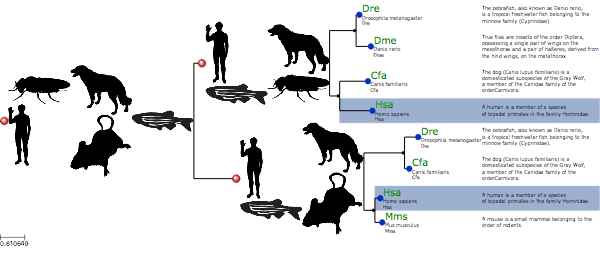

In [109]:
# Import Tree instance and faces module
from ete3 import Tree, faces, TreeStyle
import os

# Loads an example tree
nw = """
(((Dre:0.008339,Dme:0.300613)1.000000:0.596401,
(Cfa:0.640858,Hsa:0.753230)1.000000:0.182035)1.000000:0.106234,
((Dre:0.271621,Cfa:0.046042)1.000000:0.953250,
(Hsa:0.061813,Mms:0.110769)1.000000:0.204419)1.000000:0.973467);
"""
t = Tree(nw)

# You can create any random tree containing the same leaf names, and
# layout will work equally
#
# t = Tree()
# Creates a random tree with 8 leaves using a given set of names
# t.populate(8, ["Dme", "Dre", "Hsa", "Ptr", "Cfa", "Mms"])

# Set the path in which images are located
img_path = "images"
# Create faces based on external images
humanFace = faces.ImgFace(os.path.join(img_path,"Homo_sapiens.png"))
mouseFace = faces.ImgFace(os.path.join(img_path, "Mus_musculus.png"))
dogFace = faces.ImgFace(os.path.join(img_path,"Canis_familiaris.png"))
chimpFace = faces.ImgFace(os.path.join(img_path,"Pan_troglodytes.png"))
fishFace = faces.ImgFace(os.path.join(img_path,"Danio_rerio.png"))
flyFace = faces.ImgFace(os.path.join(img_path,"Drosophila_melanogaster.png"))

# Create a faces ready to read the name attribute of nodes
#nameFace = faces.TextFace(open("text").readline().strip(), fsize=20, fgcolor="#009000")
nameFace = faces.AttrFace("name", fsize=20, fgcolor="#009000")

# Create a conversion between leaf names and real names
code2name = {
        "Dre":"Drosophila melanogaster",
        "Dme":"Danio rerio",
        "Hsa":"Homo sapiens",
        "Ptr":"Pan troglodytes",
        "Mms":"Mus musculus",
        "Cfa":"Canis familiaris"
        }

# Creates a dictionary with the descriptions of each leaf name
code2desc = {
        "Dre":"""The zebrafish, also known as Danio rerio,
is a tropical freshwater fish belonging to the
minnow family (Cyprinidae).""",
        "Dme":"""True flies are insects of the order Diptera,
possessing a single pair of wings on the
mesothorax and a pair of halteres, derived from
the hind wings, on the metathorax""",
        "Hsa":"""A human is a member of a species
of bipedal primates in the family Hominidae.""",
        "Ptr":"""Chimpanzee, sometimes colloquially
chimp, is the common name for the
two extant species of ape in the genus Pan.""",
        "Mms":"""A mouse is a small mammal belonging to the
order of rodents.""",
        "Cfa": """The dog (Canis lupus familiaris) is a
domesticated subspecies of the Gray Wolf,
a member of the Canidae family of the
orderCarnivora."""
        }

# Creates my own layout function. I will use all previously created
# faces and will set different node styles depending on the type of
# node.
def mylayout(node):
    # If node is a leaf, add the nodes name and a its scientific
    # name
    if node.is_leaf():
        # Add an static face that handles the node name
        faces.add_face_to_node(nameFace, node, column=0)
        # We can also create faces on the fly
        longNameFace = faces.TextFace(code2name[node.name])
        faces.add_face_to_node(longNameFace, node, column=0)

        # text faces support multiline. We add a text face
        # with the whole description of each leaf.
        descFace = faces.TextFace(code2desc[node.name], fsize=10)
        descFace.margin_top = 10
        descFace.margin_bottom = 10
        descFace.border.margin = 1

        # Note that this faces is added in "aligned" mode
        faces.add_face_to_node(descFace, node, column=0, aligned=True)

        # Sets the style of leaf nodes
        node.img_style["size"] = 12
        node.img_style["shape"] = "circle"
    #If node is an internal node
    else:
        # Sets the style of internal nodes
        node.img_style["size"] = 6
        node.img_style["shape"] = "circle"
        node.img_style["fgcolor"] = "#000000"

    # If an internal node contains more than 4 leaves, add the
    # images of the represented species sorted in columns of 2
    # images max.
    if len(node)>=4:
        col = 0
        for i, name in enumerate(set(node.get_leaf_names())):
            if i>0 and i%2 == 0:
                col += 1
            # Add the corresponding face to the node
            if name.startswith("Dme"):
                faces.add_face_to_node(flyFace, node, column=col)
            elif name.startswith("Dre"):
                faces.add_face_to_node(fishFace, node, column=col)
            elif name.startswith("Mms"):
                faces.add_face_to_node(mouseFace, node, column=col)
            elif name.startswith("Ptr"):
                faces.add_face_to_node(chimpFace, node, column=col)
            elif name.startswith("Hsa"):
                faces.add_face_to_node(humanFace, node, column=col)
            elif name.startswith("Cfa"):
                faces.add_face_to_node(dogFace, node, column=col)

            # Modifies this node's style
            node.img_style["size"] = 16
            node.img_style["shape"] = "sphere"
            node.img_style["fgcolor"] = "#AA0000"

    # If leaf is "Hsa" (homo sapiens), highlight it using a
    # different background.
    if node.is_leaf() and node.name.startswith("Hsa"):
        node.img_style["bgcolor"] = "#9db0cf"

# And, finally, Visualize the tree using my own layout function
ts = TreeStyle()
ts.layout_fn = mylayout
t.render("%%inline", w=600, tree_style = ts)

Or more along the lines of what we may really want to do...


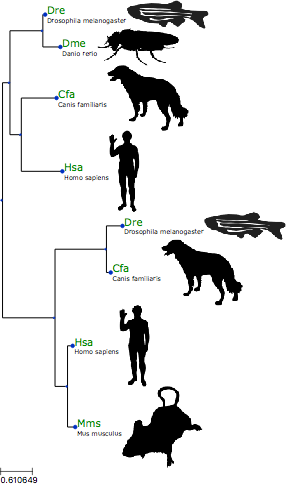

In [119]:
# Import Tree instance and faces module
from ete3 import Tree, faces, TreeStyle
import os

# Loads an example tree
nw = """
(((Dre:0.008339,Dme:0.300613)1.000000:0.596401,
(Cfa:0.640858,Hsa:0.753230)1.000000:0.182035)1.000000:0.106234,
((Dre:0.271621,Cfa:0.046042)1.000000:0.953250,
(Hsa:0.061813,Mms:0.110769)1.000000:0.204419)1.000000:0.973467);
"""
t = Tree(nw)

# You can create any random tree containing the same leaf names, and
# layout will work equally
#
# t = Tree()
# Creates a random tree with 8 leaves using a given set of names
# t.populate(8, ["Dme", "Dre", "Hsa", "Ptr", "Cfa", "Mms"])

# Set the path in which images are located
img_path = "images"
# Create faces based on external images
humanFace = faces.ImgFace(os.path.join(img_path,"Homo_sapiens.png"))
mouseFace = faces.ImgFace(os.path.join(img_path, "Mus_musculus.png"))
dogFace = faces.ImgFace(os.path.join(img_path,"Canis_familiaris.png"))
chimpFace = faces.ImgFace(os.path.join(img_path,"Pan_troglodytes.png"))
fishFace = faces.ImgFace(os.path.join(img_path,"Danio_rerio.png"))
flyFace = faces.ImgFace(os.path.join(img_path,"Drosophila_melanogaster.png"))

# Create a faces ready to read the name attribute of nodes
#nameFace = faces.TextFace(open("text").readline().strip(), fsize=20, fgcolor="#009000")
nameFace = faces.AttrFace("name", fsize=16, fgcolor="#009000")

# Create a conversion between leaf names and real names
code2name = {
        "Dre":"Drosophila melanogaster",
        "Dme":"Danio rerio",
        "Hsa":"Homo sapiens",
        "Ptr":"Pan troglodytes",
        "Mms":"Mus musculus",
        "Cfa":"Canis familiaris"
        }

def mylayout(node):
    # If node is a leaf, add the nodes name and a its scientific
    # name
    if node.is_leaf():
        # Add an static face that handles the node name
        faces.add_face_to_node(nameFace, node, column=0)
        # We can also create faces on the fly
        longNameFace = faces.TextFace(code2name[node.name])
        faces.add_face_to_node(longNameFace, node, column=0)
    
        # Sets the style of leaf nodes
        node.img_style["size"] = 6
        node.img_style["shape"] = "circle"
        
        # Add the corresponding face to the node
        if node.name.startswith("Dme"):
            faces.add_face_to_node(flyFace, node, column=1)
        elif node.name.startswith("Dre"):
            faces.add_face_to_node(fishFace, node, column=1)
        elif node.name.startswith("Mms"):
            faces.add_face_to_node(mouseFace, node, column=1)
        elif node.name.startswith("Ptr"):
            faces.add_face_to_node(chimpFace, node, column=1)
        elif node.name.startswith("Hsa"):
            faces.add_face_to_node(humanFace, node, column=1)
        elif node.name.startswith("Cfa"):
            faces.add_face_to_node(dogFace, node, column=1)

# And, finally, Visualize the tree using my own layout function
ts = TreeStyle()
ts.show_leaf_name=False
ts.layout_fn = mylayout
t.render("%%inline", h=500, tree_style = ts)